In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df0 = pd.read_csv("mnist_train.csv")

In [14]:
df0.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
df0.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [16]:
df0.shape

(60000, 785)

In [25]:
#Saving the labels in an array such that t-SNE can be performed on the data
l = df0['label']
df = df0.drop('label',axis=1)

In [26]:
#creating a train set
data = df.head(42000)

In [36]:
labels = l.head(42000)

In [27]:
data.shape

(42000, 784)

The train dataset has 42000 observations and 784 features

In [30]:
#Standardization of data

from sklearn.preprocessing import StandardScaler
stzd_data = StandardScaler().fit_transform(data)

In [31]:
stzd_data.shape

(42000, 784)

In [34]:
#Applying t-SNE on the Standardized data
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0)

In [35]:
tsne_data = model.fit_transform(stzd_data)

In [38]:
tsne_data=np.vstack((tsne_data.T, labels)).T

In [43]:
tsne_df = pd.DataFrame(data=tsne_data, columns=("D1","D2","labels"))

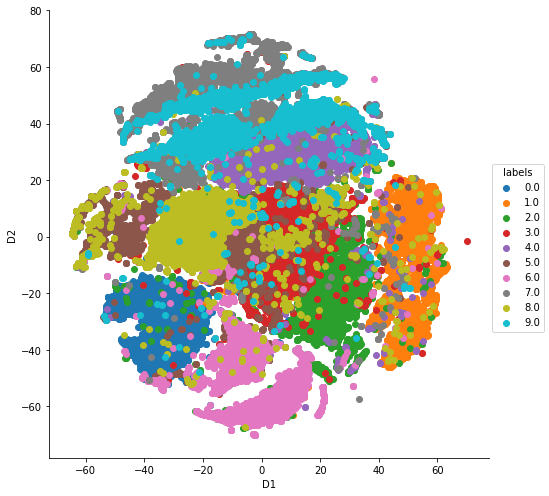

In [45]:
#Plotting 

sns.FacetGrid(tsne_df,hue='labels',size=7) \
    .map(plt.scatter,'D1','D2')\
    .add_legend()
plt.show()

In [46]:
#Trying t-sne with different perplexity
model = TSNE(n_components=2, random_state=0,perplexity = 50)
tsne_data = model.fit_transform(stzd_data)

In [ ]:
tsne_data=np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("D1","D2","labels"))

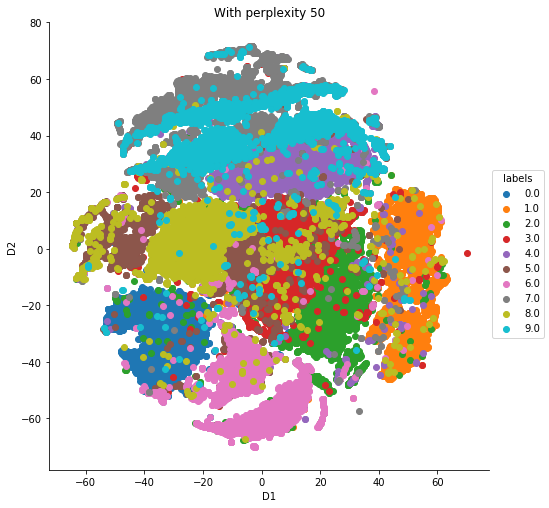

In [47]:
sns.FacetGrid(tsne_df,hue='labels',size=7) \
    .map(plt.scatter,'D1','D2')\
    .add_legend()
plt.title("With perplexity 50")
plt.show()

In [ ]:
#Trying the same with more iterations
model = TSNE(n_components=2, random_state=0,perplexity = 50,n_iter=5000)
tsne_data = model.fit_transform(stzd_data)

In [49]:
tsne_data=np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("D1","D2","labels"))

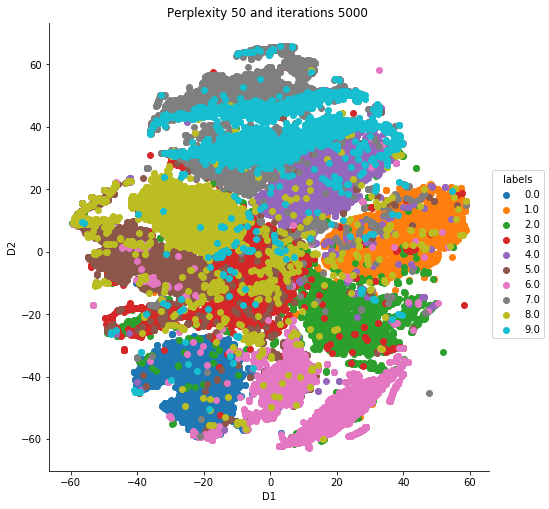

In [50]:
sns.FacetGrid(tsne_df,hue='labels',size=7) \
    .map(plt.scatter,'D1','D2')\
    .add_legend()
plt.title("Perplexity 50 and iterations 5000 ")
plt.show()